# TP1

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv('data/USA_Housing.csv')

In [105]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# 2. Division des donnees

In [107]:
X = data.iloc[ : , :1 ].values
y = data.iloc[ : , -2].values

In [108]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [109]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

# 4.1 Separation de donnees : Train et Test

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [111]:
print('X-train Shape: ', X_train.shape)
print('X-test Shape: ', X_test.shape)
print('y-train Shape: ', y_train.shape)
print('y-test Shape: ', y_test.shape)

X-train Shape:  (3750, 1)
X-test Shape:  (1250, 1)
y-train Shape:  (3750,)
y-test Shape:  (1250,)


# 5. Construire le Modele

In [112]:
modele_lineaire = LinearRegression()

In [113]:
# Entrainement du modele
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [114]:
y_price_pred = modele_lineaire.predict(X_test)

In [115]:
result = pd.DataFrame(y_test, y_price_pred)

In [116]:
result

,0
9.678207e+05,7.384115e+05
1.362138e+06,1.621982e+06
1.318759e+06,1.160398e+06
1.198338e+06,8.435362e+05
1.180522e+06,8.763488e+05
...,...
1.762047e+06,1.708102e+06
1.102120e+06,7.777189e+05
9.083927e+05,1.009972e+06
1.185878e+06,1.061552e+06


In [117]:
# Evaluation du modele
print('MSE de la regression Lineaire :',mean_squared_error(y_test, y_price_pred))

MSE de la regression Lineaire : 75851024335.87088


In [118]:
print('R2 Score de la regression Lineaire :',r2_score(y_test, y_price_pred))

R2 Score de la regression Lineaire : 0.407977180439141


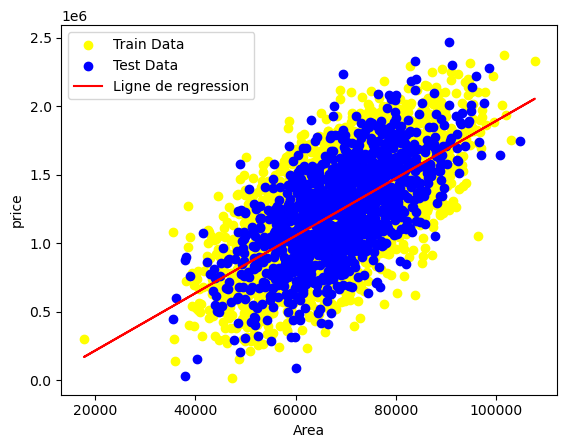

In [119]:
# 6. Visualisation de Resultats
plt.scatter(X_train,y_train,color='yellow', label='Train Data')
plt.scatter(X_test,y_test,color='blue', label='Test Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de regression')
plt.xlabel('Area')
plt.ylabel('price')
plt.legend()
plt.show()

# 7. Prediction simple

In [120]:
resultat = pd.DataFrame({'y-area-test' : y_test,'y-price-predits': y_price_pred })

In [121]:
resultat['difference'] = resultat['y-area-test'] - resultat['y-price-predits']
resultat

,y-area-test,y-price-predits,difference
0,7.384115e+05,9.678207e+05,-229409.157890
1,1.621982e+06,1.362138e+06,259844.687878
2,1.160398e+06,1.318759e+06,-158361.283426
3,8.435362e+05,1.198338e+06,-354801.741505
4,8.763488e+05,1.180522e+06,-304172.920360
...,...,...,...
1245,1.708102e+06,1.762047e+06,-53944.477708
1246,7.777189e+05,1.102120e+06,-324401.466049
1247,1.009972e+06,9.083927e+05,101579.365778
1248,1.061552e+06,1.185878e+06,-124325.778921


In [122]:
print(modele_lineaire.predict([[61287.067178656784]]))

[1080829.81869227]
